In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('../data/dataset.csv')
dataset.head()

,total_sessions_day0,total_sessions_day1,total_sessions_day3,total_sessions_day7,chapters_finished_day0,chapters_finished_day1,chapters_finished_day3,chapters_finished_day7,chapters_opened_day0,chapters_opened_day1,...,install_date,country_code,ad_ltv_day0,ad_ltv_day1,ad_ltv_day3,platform,target_sub_ltv_day30,target_iap_ltv_day30,target_ad_ltv_day30,target_full_ltv_day30
0,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_135,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
2,1.0,2.0,2.0,2.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_141,0.0,0.0,0.0,ios,0.0,0.0,0.0,0.0
4,1.0,1.0,1.0,1.0,0,0,0,0,0,0,...,2021-12-03,COUNTRY_203,0.0,0.0,0.0,android,0.0,0.0,0.0,0.0


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1467832 entries, 0 to 1467831
Data columns (total 63 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   total_sessions_day0         1466467 non-null  float64
 1   total_sessions_day1         1466465 non-null  float64
 2   total_sessions_day3         1466464 non-null  float64
 3   total_sessions_day7         1466458 non-null  float64
 4   chapters_finished_day0      1467832 non-null  int64  
 5   chapters_finished_day1      1467832 non-null  int64  
 6   chapters_finished_day3      1467832 non-null  int64  
 7   chapters_finished_day7      1467832 non-null  int64  
 8   chapters_opened_day0        1467832 non-null  int64  
 9   chapters_opened_day1        1467832 non-null  int64  
 10  chapters_opened_day3        1467832 non-null  int64  
 11  chapters_opened_day7        1467832 non-null  int64  
 12  chapters_closed_day0        1467832 non-null  int64  
 1

In [4]:
dataset.isnull().sum()

total_sessions_day0       1365
total_sessions_day1       1367
total_sessions_day3       1368
total_sessions_day7       1374
chapters_finished_day0       0
                          ... 
platform                     0
target_sub_ltv_day30         0
target_iap_ltv_day30         0
target_ad_ltv_day30          0
target_full_ltv_day30        0
Length: 63, dtype: int64

In [5]:
dataset.duplicated().sum()

840221

In [6]:
columnsWithNaNs = ['total_sessions_day0', 'total_sessions_day1', 'total_sessions_day3', 'total_sessions_day7']
dataset[columnsWithNaNs] = dataset[columnsWithNaNs].fillna(0)
dataset.isnull().sum()

total_sessions_day0       0
total_sessions_day1       0
total_sessions_day3       0
total_sessions_day7       0
chapters_finished_day0    0
                         ..
platform                  0
target_sub_ltv_day30      0
target_iap_ltv_day30      0
target_ad_ltv_day30       0
target_full_ltv_day30     0
Length: 63, dtype: int64

In [7]:
mediaSourceData = dataset[['target_full_ltv_day30', 'media_source']]\
    .groupby(['media_source'], group_keys=True)\
    .sum()
mediaSourceData.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_full_ltv_day30
media_source,
SOURCE_17,178081.217393
SOURCE_23,88381.038661
SOURCE_4,58684.510253
SOURCE_1,11350.813876
SOURCE_2,9140.568484
SOURCE_10,8457.155253
SOURCE_5,7016.308524
SOURCE_6,6402.577282
SOURCE_18,2293.067194


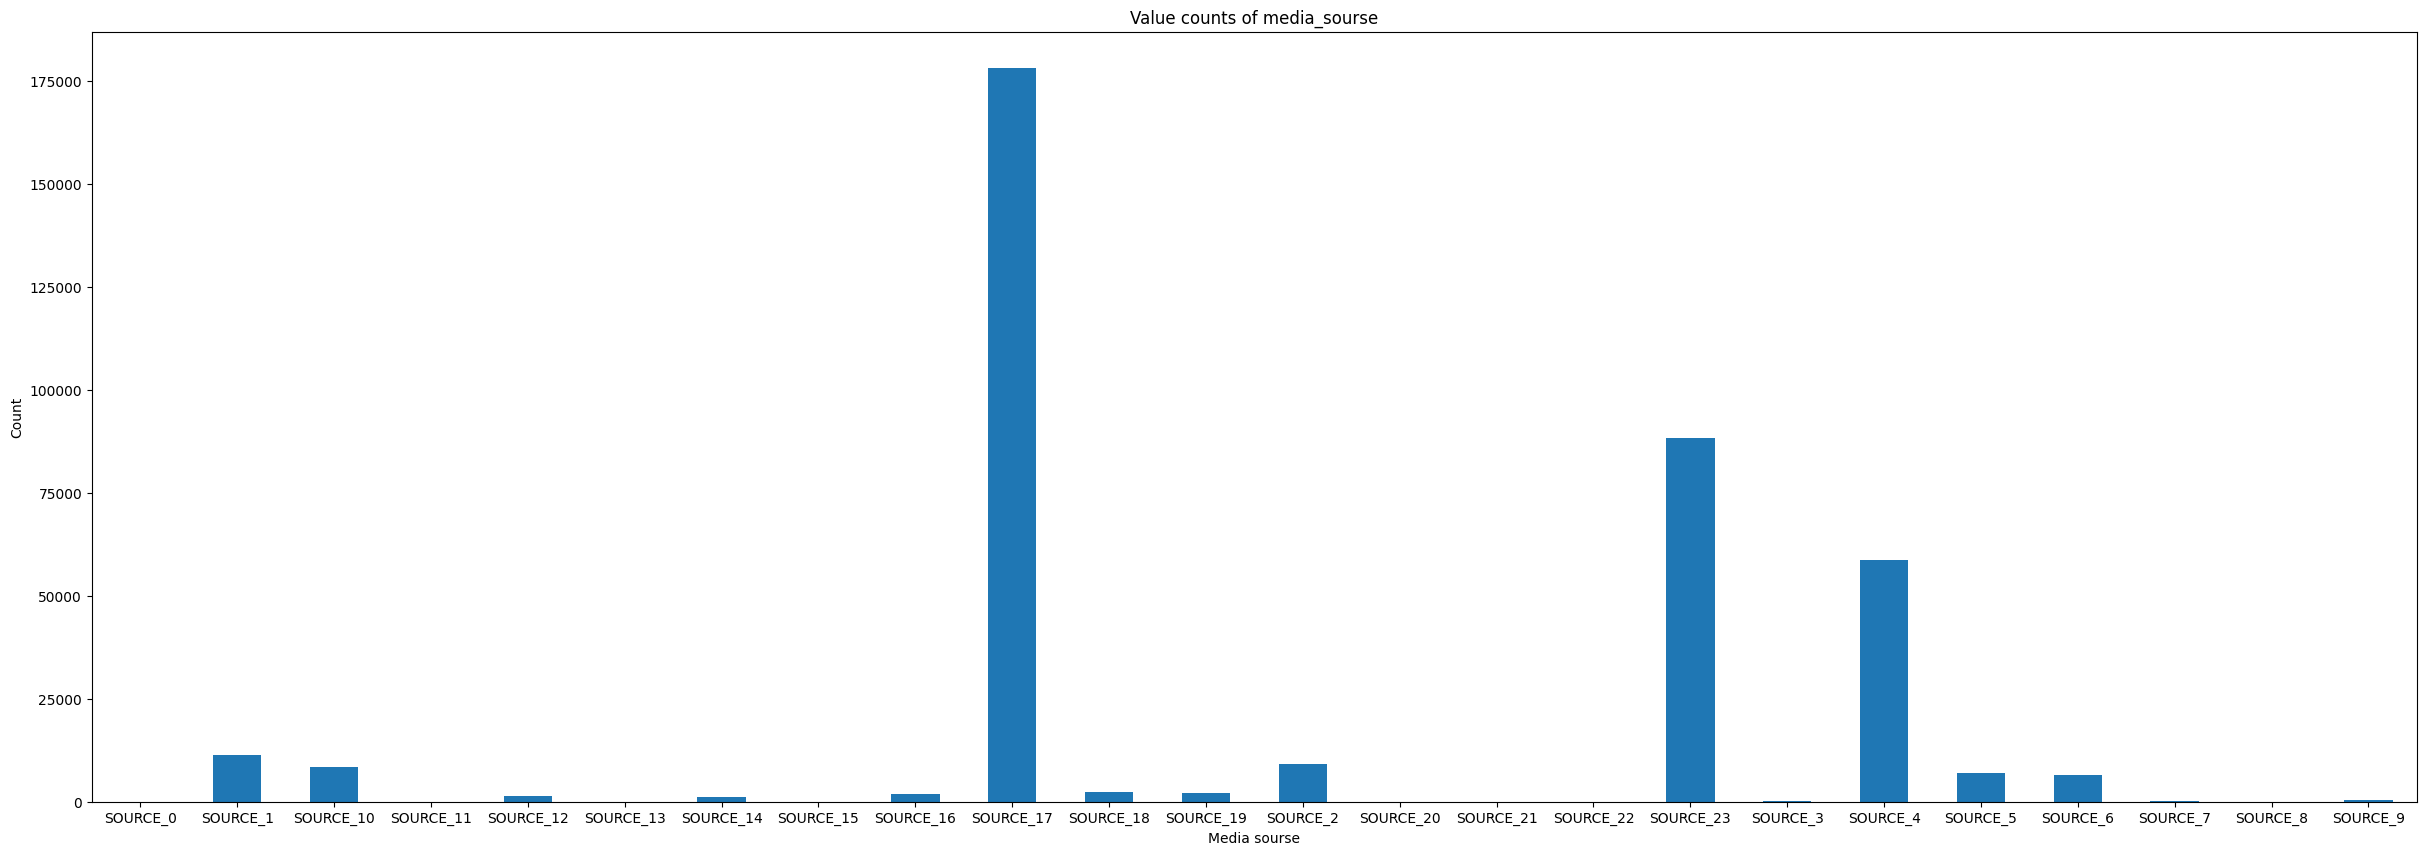

In [8]:
mediaSourceData.target_full_ltv_day30.plot(kind='bar', figsize=(30,10))
plt.title("Value counts of media_sourse")
plt.xlabel("Media sourse")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [9]:
platformData = dataset[['target_full_ltv_day30', 'platform']]\
    .groupby(['platform'], group_keys=True)\
    .sum()
platformData.sort_values(by=['target_full_ltv_day30'], ascending=False)


,target_full_ltv_day30
platform,
ios,288943.060867
android,88103.127418


In [10]:
# прибуток щоденно від користувачів протягом кожного дня
calendarData = dataset[['install_date', 'target_full_ltv_day30']]\
    .groupby(['install_date'], group_keys=True)\
    .sum()
calendarData

,target_full_ltv_day30
install_date,
2021-12-01,4037.087482
2021-12-02,4130.755241
2021-12-03,3204.499475
2021-12-04,3800.636048
2021-12-05,3936.646668
...,...
2022-01-27,4457.286218
2022-01-28,4121.477517
2022-01-29,3599.604066


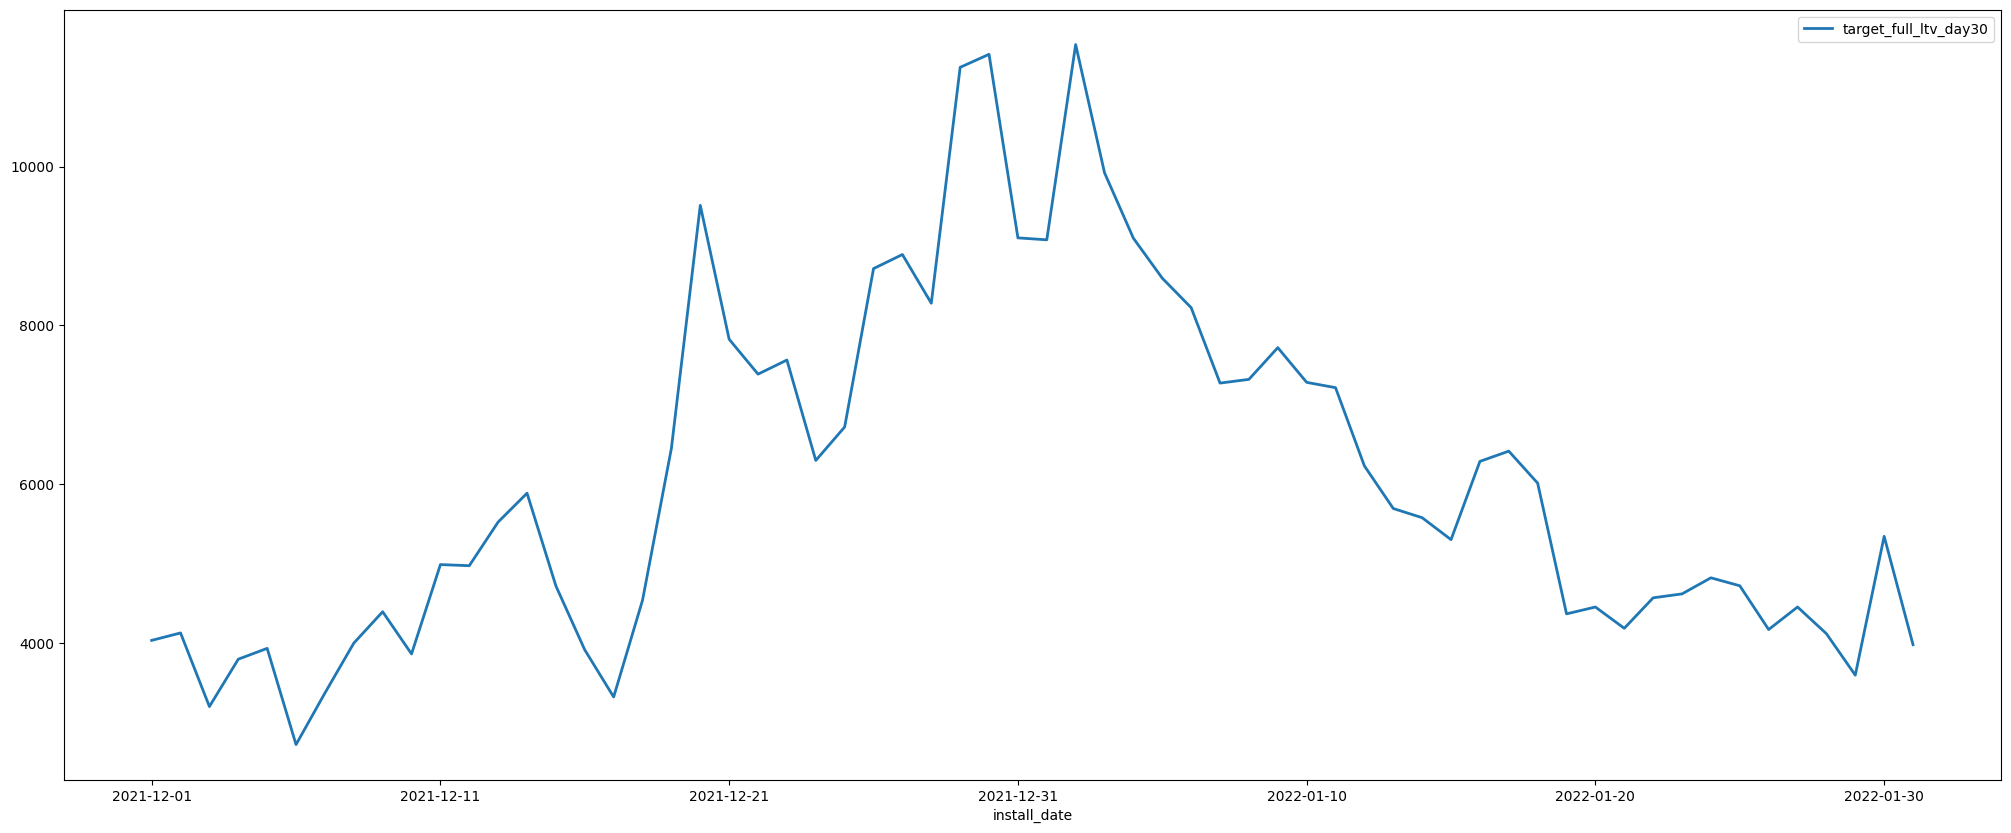

In [11]:
calendarData.plot(kind='line', linewidth=2, figsize=(25,10))
plt.show()

In [12]:
# дослідження країн
Country_data = dataset[['target_full_ltv_day30', 'country_code']]\
    .groupby(['country_code'], group_keys=True)\
    .sum()

Country_data.sort_values(by=['target_full_ltv_day30'], ascending=False)

,target_full_ltv_day30
country_code,
COUNTRY_141,235195.833606
COUNTRY_155,65447.934889
COUNTRY_38,22037.631186
COUNTRY_72,21639.449274
COUNTRY_129,3281.257060
...,...
COUNTRY_47,0.000000
COUNTRY_70,0.000000
COUNTRY_48,0.000000


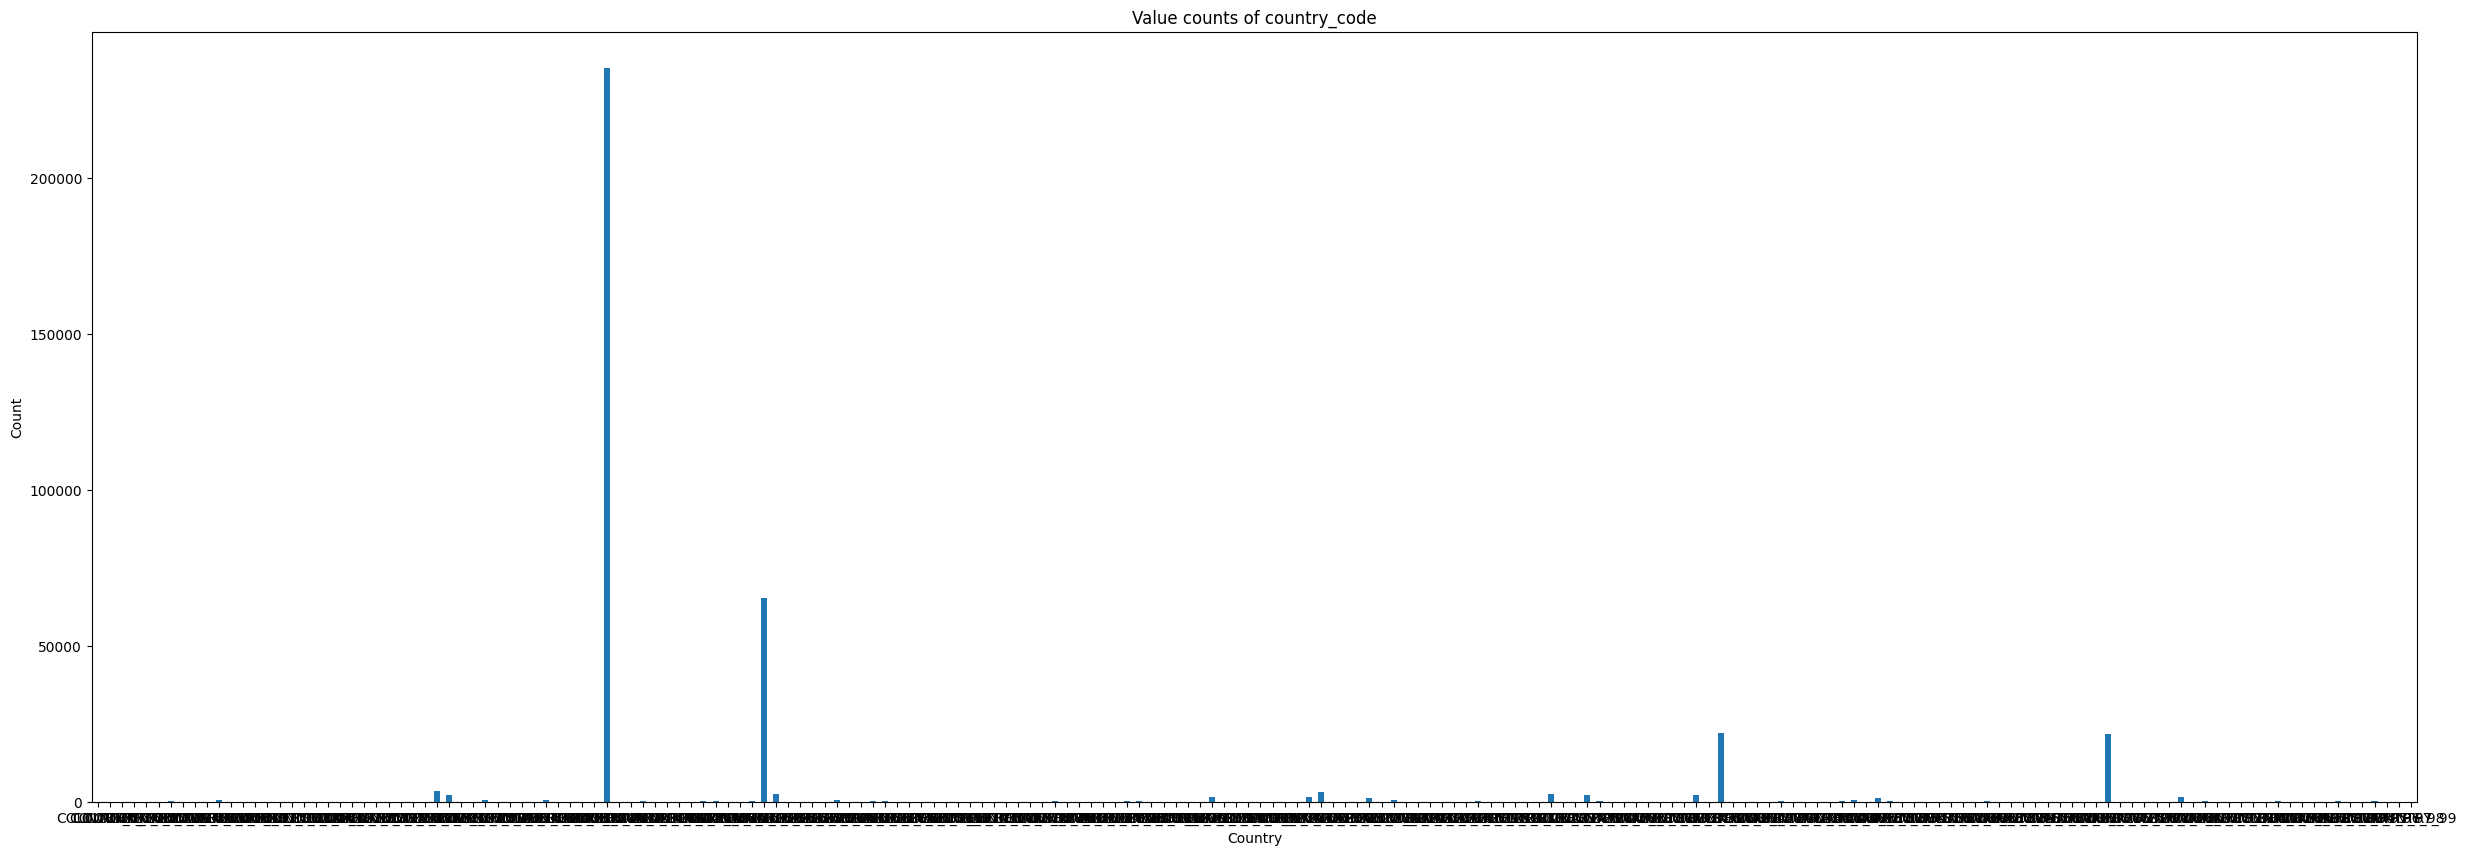

In [13]:
Country_data.loc[(Country_data.target_full_ltv_day30 !=0)].target_full_ltv_day30.plot(kind='bar', figsize=(30,10))
plt.title("Value counts of country_code")
plt.xlabel("Country")
plt.xticks(rotation=0)
plt.ylabel("Count")
plt.show()

In [14]:
# дослідження країн + ресурсу
Country_platform_data = dataset[['target_full_ltv_day30', 'country_code', 'media_source']]\
    .groupby(['media_source','country_code'], group_keys=True)\
    .sum()

Country_platform_data.sort_values(by=['target_full_ltv_day30'], ascending=False)

target_full_ltv_day30
media_source country_code                       
SOURCE_17    COUNTRY_141           117556.471910
SOURCE_23    COUNTRY_141            53492.987888
SOURCE_4     COUNTRY_141            29145.938965
SOURCE_17    COUNTRY_155            23513.913901
SOURCE_4     COUNTRY_155            17839.556579
...                                          ...
SOURCE_23    COUNTRY_48                 0.000000
             COUNTRY_47                 0.000000
SOURCE_17    COUNTRY_42                 0.000000
             COUNTRY_49                 0.000000
SOURCE_16    COUNTRY_113                0.000000

[1132 rows x 1 columns]

<AxesSubplot:xlabel='media_source,country_code'>

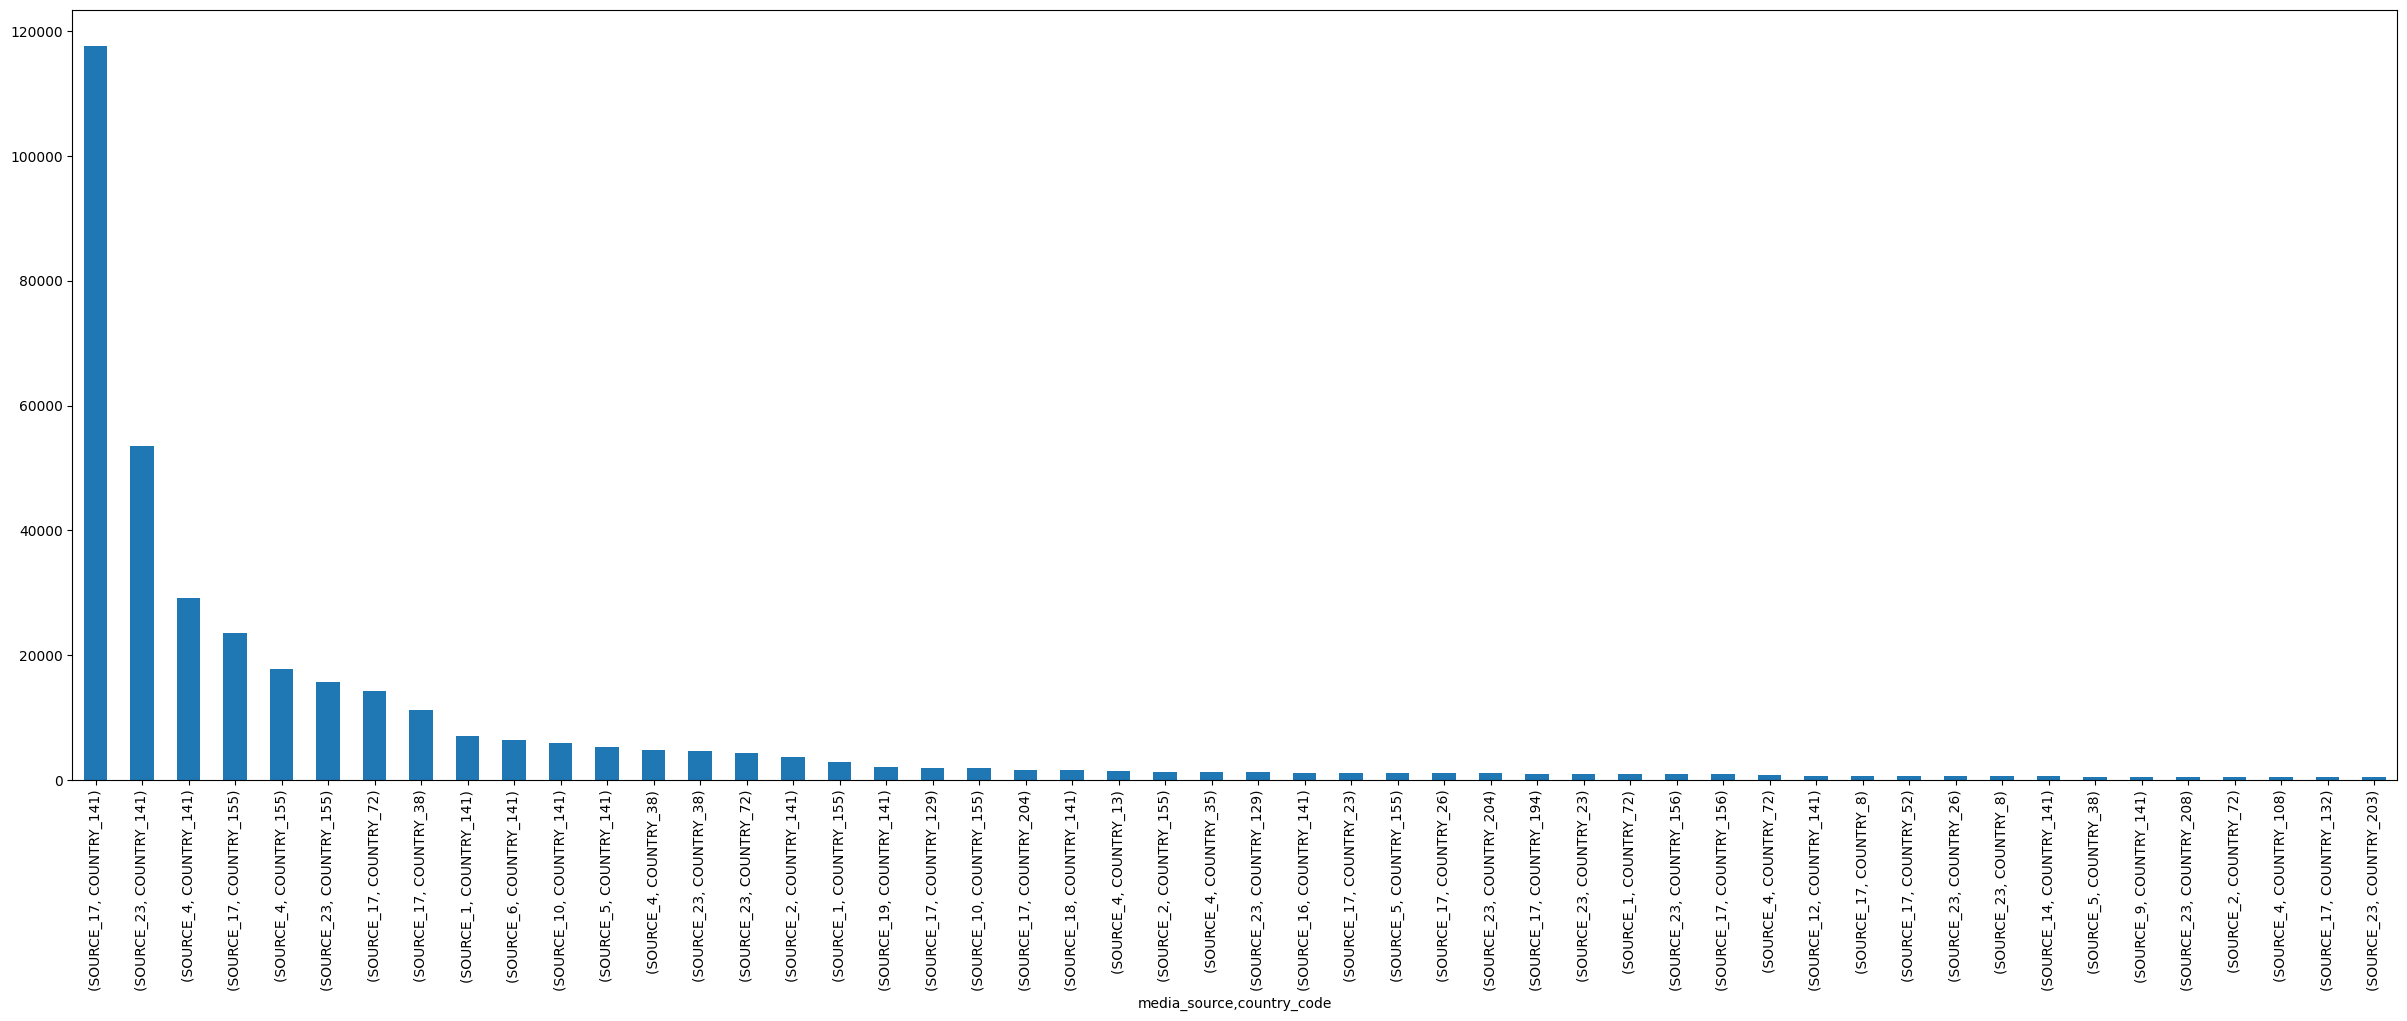

In [17]:
Country_platform_data.loc[(Country_platform_data.target_full_ltv_day30 !=0)].sort_values(by=['target_full_ltv_day30'], ascending=False).head(50).target_full_ltv_day30.plot(kind='bar', figsize=(30,10))

<AxesSubplot:>

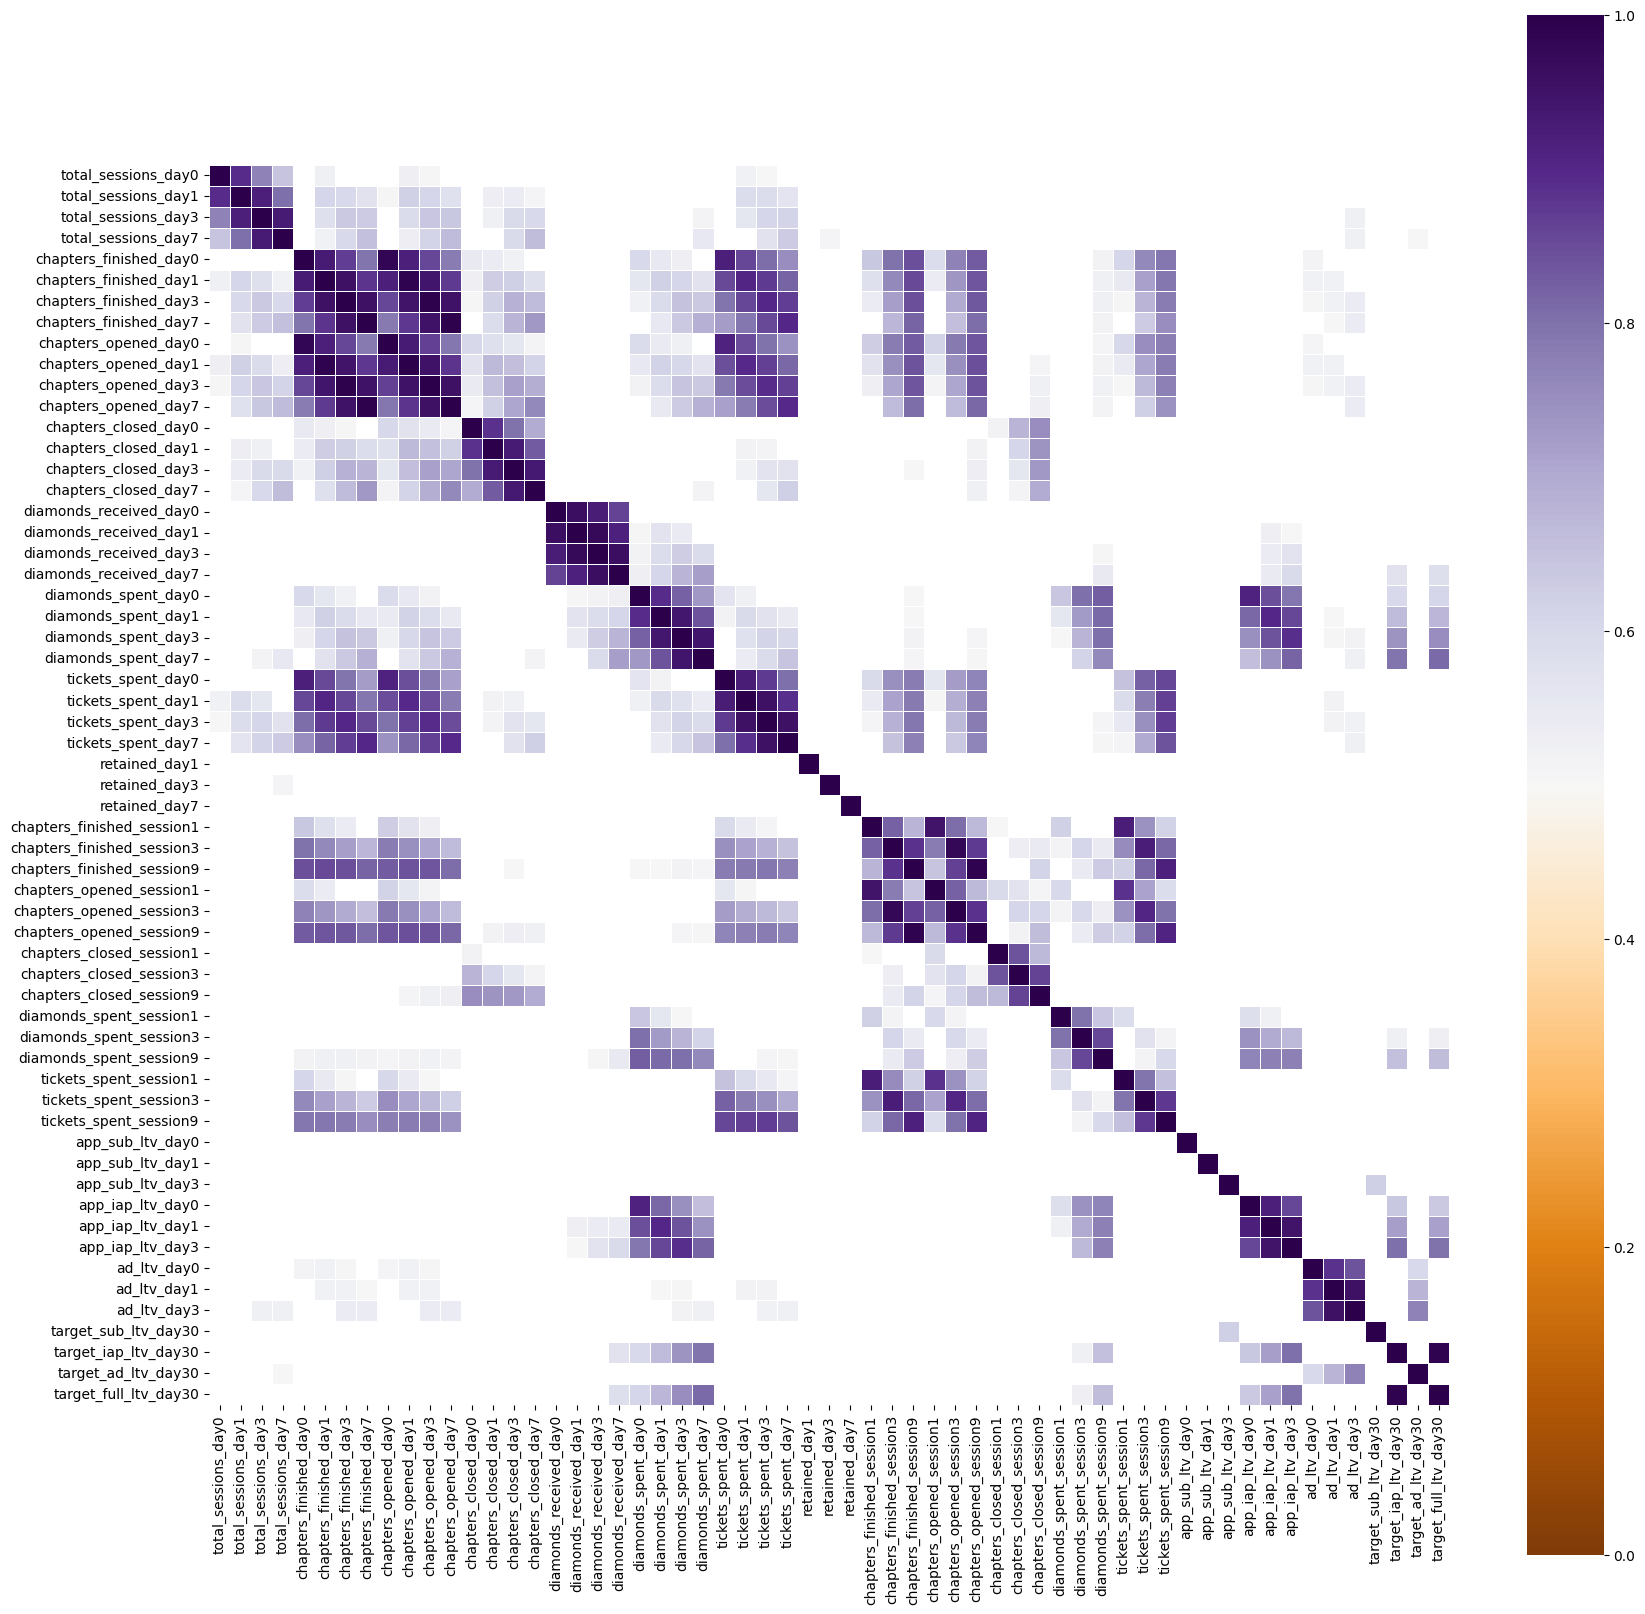

In [18]:
corr = dataset.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4) ], cmap='PuOr',  linewidths=.5,  vmin=0, vmax=1, square=True)

In [19]:
dataset_1 = dataset
dataset_1['total_sessions'] = dataset_1['total_sessions_day0']+dataset_1['total_sessions_day1']+dataset_1['total_sessions_day3']+dataset_1['total_sessions_day7']
corr_1 = dataset_1.corr()
#кореляція загальної кількісті сесій
corr_total_sessions = corr_1['total_sessions'].sort_values(axis=0,ascending=False ).iloc[4:]
corr_total_sessions

total_sessions_day0           0.820097
chapters_opened_day7          0.654091
chapters_finished_day7        0.644959
chapters_opened_day3          0.643095
chapters_finished_day3        0.632700
tickets_spent_day7            0.629038
chapters_closed_day7          0.616897
tickets_spent_day3            0.610989
chapters_opened_day1          0.599436
chapters_closed_day3          0.596380
chapters_finished_day1        0.588954
tickets_spent_day1            0.567305
ad_ltv_day3                   0.533006
chapters_closed_day1          0.532855
diamonds_spent_day7           0.532021
ad_ltv_day1                   0.500952
diamonds_spent_day3           0.499615
chapters_opened_day0          0.494839
chapters_finished_day0        0.486461
retained_day1                 0.480187
retained_day3                 0.472910
tickets_spent_day0            0.468781
target_ad_ltv_day30           0.451805
diamonds_spent_day1           0.442063
chapters_opened_session9      0.422833
ad_ltv_day0              

In [20]:
#кореляція сумарного доходу з користувача на 30 день

corr_list_full_ltv = corr['target_full_ltv_day30'].sort_values(axis=0,ascending=False ).iloc[1:]
corr_list_full_ltv

target_iap_ltv_day30          0.988739
diamonds_spent_day7           0.809262
app_iap_ltv_day3              0.799408
diamonds_spent_day3           0.751245
app_iap_ltv_day1              0.717920
diamonds_spent_day1           0.674307
diamonds_spent_session9       0.662524
app_iap_ltv_day0              0.636444
diamonds_spent_day0           0.605621
diamonds_received_day7        0.584553
diamonds_spent_session3       0.528519
diamonds_received_day3        0.476700
target_ad_ltv_day30           0.445982
chapters_finished_day7        0.420365
target_sub_ltv_day30          0.416774
chapters_opened_day7          0.413583
diamonds_received_day1        0.394815
tickets_spent_day7            0.391570
chapters_finished_day3        0.375659
chapters_opened_day3          0.369447
ad_ltv_day3                   0.368362
diamonds_spent_session1       0.368041
tickets_spent_day3            0.346518
ad_ltv_day1                   0.334121
chapters_finished_day1        0.333980
chapters_opened_day1     

In [21]:
#кореляція сумарного доходу з підписок на 30 день

corr_list_sub_ltv = corr['target_sub_ltv_day30'].sort_values(axis=0,ascending=False ).iloc[1:]
corr_list_sub_ltv

app_sub_ltv_day3              0.622404
target_full_ltv_day30         0.416774
diamonds_spent_day7           0.306259
diamonds_spent_day3           0.295309
app_iap_ltv_day3              0.291586
target_iap_ltv_day30          0.291062
app_iap_ltv_day1              0.277035
diamonds_spent_session9       0.276018
diamonds_spent_day1           0.275954
diamonds_spent_day0           0.253882
app_sub_ltv_day1              0.253152
app_iap_ltv_day0              0.251052
diamonds_received_day7        0.228619
diamonds_spent_session3       0.222598
diamonds_received_day3        0.191881
app_sub_ltv_day0              0.186790
chapters_opened_day7          0.177895
chapters_finished_day7        0.177721
target_ad_ltv_day30           0.177526
ad_ltv_day3                   0.169817
chapters_opened_day3          0.166349
chapters_finished_day3        0.166085
diamonds_received_day1        0.163645
diamonds_spent_session1       0.163298
ad_ltv_day1                   0.157861
chapters_opened_day1     

In [22]:
#кореляція сумарного доходу з покупки кристалів і тікетів на 30 день

corr_list_iap_ltv = corr['target_iap_ltv_day30'].sort_values(axis=0,ascending=False ).iloc[1:]
corr_list_iap_ltv

target_full_ltv_day30         0.988739
app_iap_ltv_day3              0.803214
diamonds_spent_day7           0.795333
diamonds_spent_day3           0.739926
app_iap_ltv_day1              0.719341
diamonds_spent_day1           0.664165
diamonds_spent_session9       0.655561
app_iap_ltv_day0              0.638208
diamonds_spent_day0           0.598902
diamonds_received_day7        0.573960
diamonds_spent_session3       0.524015
diamonds_received_day3        0.469491
chapters_finished_day7        0.394838
diamonds_received_day1        0.389347
chapters_opened_day7          0.387240
target_ad_ltv_day30           0.381018
tickets_spent_day7            0.372321
diamonds_spent_session1       0.363387
chapters_finished_day3        0.352364
chapters_opened_day3          0.345399
tickets_spent_day3            0.328332
ad_ltv_day3                   0.315320
chapters_finished_day1        0.312874
chapters_opened_day1          0.306294
chapters_finished_session9    0.301957
chapters_opened_session9 

In [23]:
#кореляція сумарного доходу з реклами на 30 день

corr_list_ad_ltv = corr['target_ad_ltv_day30'].sort_values(axis=0,ascending=False ).iloc[1:]
corr_list_ad_ltv

ad_ltv_day3                   0.773183
ad_ltv_day1                   0.678940
ad_ltv_day0                   0.597824
total_sessions_day7           0.502808
diamonds_spent_day7           0.483795
chapters_opened_day7          0.457802
chapters_finished_day7        0.454920
chapters_closed_day7          0.448207
target_full_ltv_day30         0.445982
tickets_spent_day7            0.435903
total_sessions_day3           0.424466
diamonds_spent_day3           0.406795
chapters_opened_day3          0.401367
chapters_finished_day3        0.398861
chapters_closed_day3          0.382737
tickets_spent_day3            0.381622
target_iap_ltv_day30          0.381018
total_sessions_day1           0.354636
chapters_opened_day1          0.350406
chapters_finished_day1        0.348463
diamonds_spent_day1           0.343907
diamonds_received_day7        0.342165
tickets_spent_day1            0.338154
retained_day7                 0.316845
chapters_closed_day1          0.314928
chapters_opened_session9 

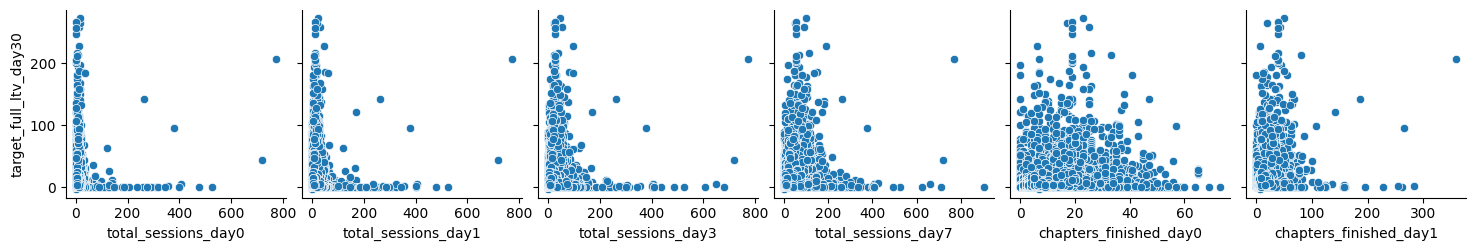

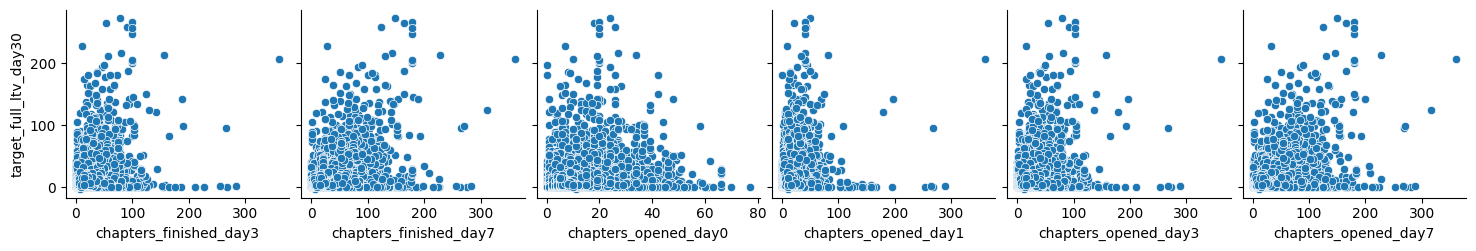

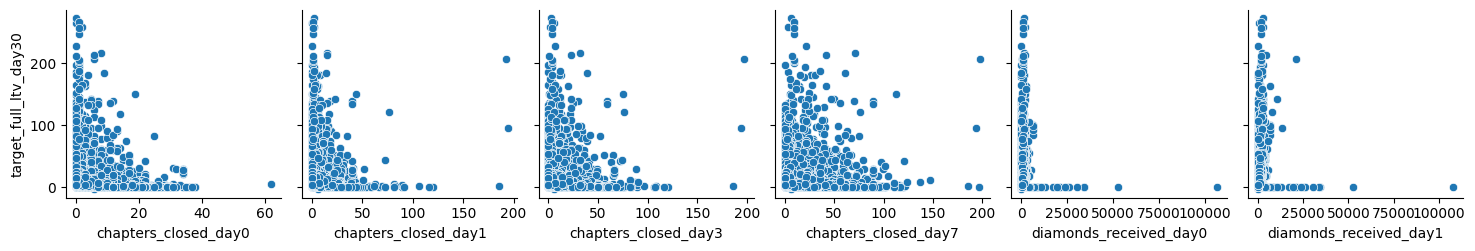

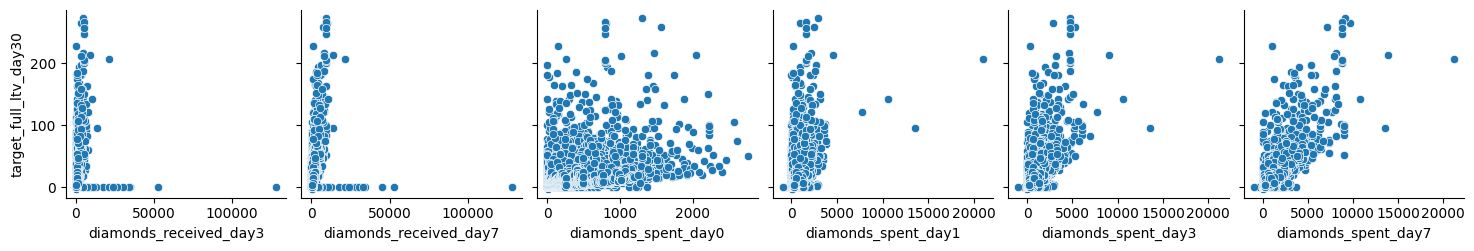

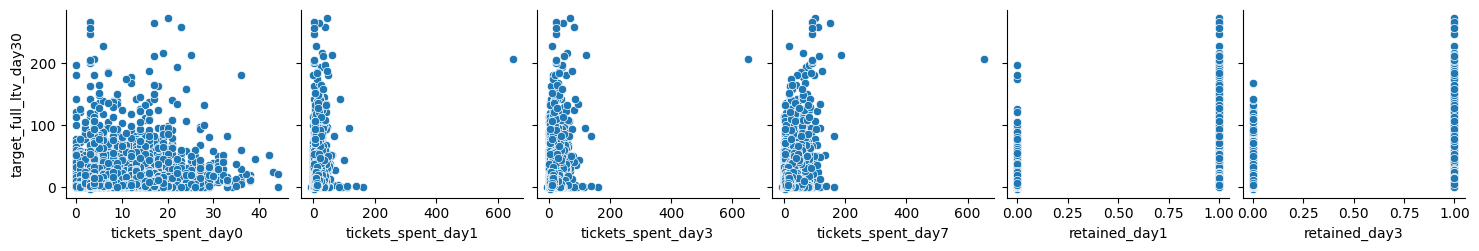

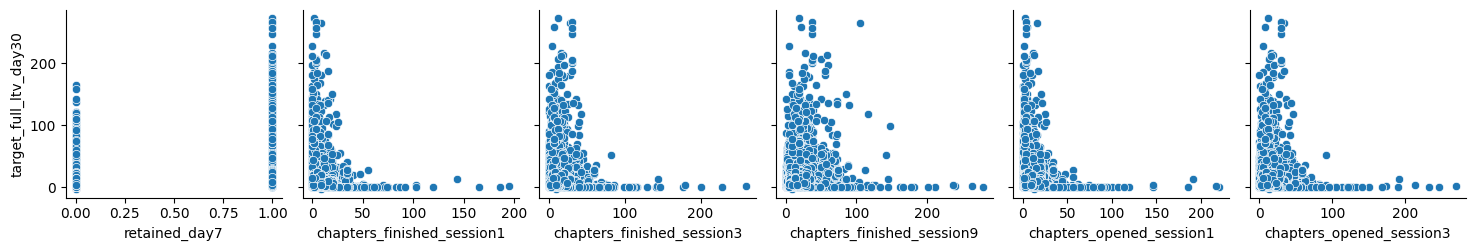

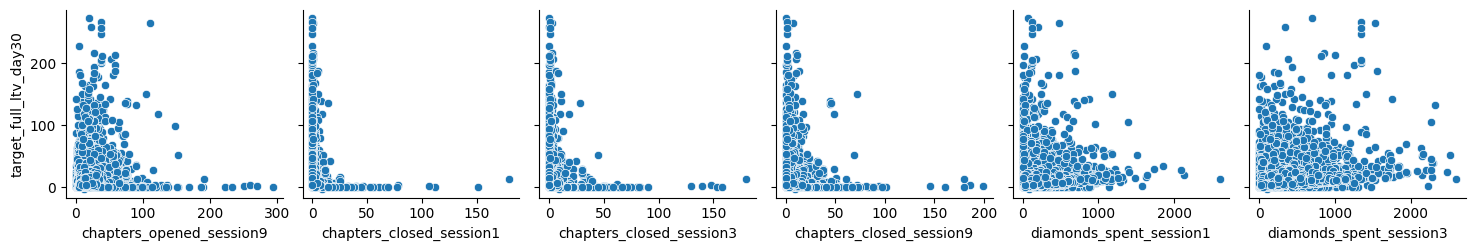

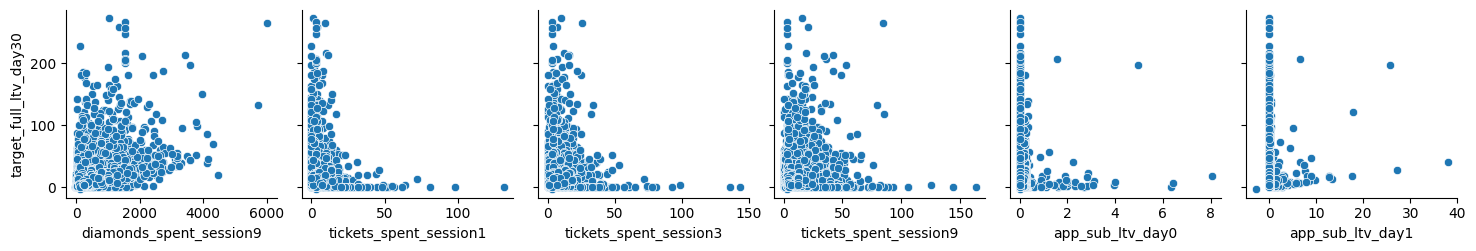

In [24]:
#Відношення target_full_ltv_day30 до кожного показника

for i in range(0, len(dataset.columns), 6):
    sns.pairplot(data=dataset,
                x_vars=dataset.columns[i:i+6],
                y_vars=['target_full_ltv_day30'])

In [ ]:
dataset.columns